<center><h1 class="background-title">Workshop 10 - Background<br>CNN</h1></center>

## Convolutional Neural Networks (CNN)

One of the properties of the MLP model is that it is insensitive to the ordering of the input data. This is due to the fact that it uses fully connected layers, in which all data points are connected to all other data points. In many cases, this is a desired property, but it comes at the price of having a very high number of parameters.

Therefore, in cases where the data has some spatial structure to it, where the data is stored in a meaningful order, we would like to take advantage of this spatial structure when designing the network's architecture. An example of such spatially structured data are images, which are stored as a 2D array of pixels.

Convolutional Neural Networks are feed-forward ANN, which tries to make use of this property by using spatial aware layers such as convolutional layers.

## 1D Convolutional Layer

The 1D convolutional layer performs a cross-correlation operation between an input vector $\boldsymbol{x}$ and a vector of parameters $\boldsymbol{w}$ of length $K$:

$$
\boldsymbol{y}\left[n\right]=\sum_{m=0}^{K-1} \boldsymbol{x}\left[n+m\right]\boldsymbol{w}\left[m\right]
$$

The vector $\boldsymbol{w}$ is usually known as the **convolution kernel** or the layer's weights, and is usually a short vector of length no longer than 7.

Graphically this operation can be drawn as so:
<center><img src="../media/diagrams/networks/conv_layer.png" width="300px" style="width:300px"/></center>

Note that this structure resembles the fully connected layer, except for two main differences:

1. Each output is only connected to a subset of the inputs which are within all in a finite range from one another.

2. All outputs are generated using the same weights.

These two differences are usually related to the following two properties of the input data:

- The relation between data points located close to one another by is more significant than the relation between far away data points.

- Small local areas in different regions of the data, share some common properties.

These two differences significantly reduce the number of parameters of the layer. While a fully connected layer would have $N_\text{inputs}\times N_\text{outputs}$ parameters, which can usually be very large, the convolutional layer has only $K$ parameters.

As stated before, the convolutional layer uses the spatial structure of the input data to reduce the number of the network's parameters significantly.

A more common way to plot the convolutional layer is as follow:

<center><img src="../media/diagrams/networks/conv_layer.gif?3" height="250px" style="height:250px"/></center>

Where $h\left(\boldsymbol{z}\right)=\boldsymbol{w}^T\boldsymbol{z}=w_1z_1+w_2z_3+w_4z_5$.

We will usually also add an additional offset term $b$, commonly knows as the bias, to the function $h$ to get the following function:

$$
h\left(\boldsymbol{z}\right)=\boldsymbol{w}^T\boldsymbol{z} + b
$$

The bias term is an additional parameter of the layer.

## Activation (Non-Linear) Layers

As the same as in the case of the MLP, we would usually want to have an activation function (a non-linear function) following the linear layers. The most common activation function used in CNNs is the ReLU (Rectified Linear Unit) function: $\varphi\left(x\right)=\max\left(x,0\right)$.
<center><img src="../media/other/relu.png" width="250px" style="width:250px"/></center>

Any other activation function can be used just as well.

Non-linearity layers or activation layers are layers which take an input vector and apply the activation function to the elements of the input vector. Commonly every convolutional layer will be followed by an activation layer:

<center><img src="../media/diagrams/networks/conv_layer_nonlinear.png?2" height="300px" style="height:300px"/></center>

## Multiple Channels Input

In some cases, we would like the input of a convolutional layer to contain multiple channels. This happens when we have multiple values which correspond to a single spatial location. One example is a stereo or a multi-channel audio recording, where each point in time has multiple recordings related to it. Another example are colored imaged which have 3 color channels (usually: red, green and blue) at each spatial location.

In such a case we will want each $h$ function to be a function of the inputs from all input channels:

<center><img src="../media/diagrams/networks/conv_layer_multi_channel.gif" height="300px" style="height:300px"/></center>

In this case, the function $h$ will perform a linear combination of all inputs. Like before, $h$ will usually also contain a bias term and will be followed by an activation layer.

## Multiple Channels Output

In addition, we will usually want to use more than one $h$ function, i.e. more than one convolution kernel, in order to produce multiple output channel. The convilutional layer will now appear as follow:

<center><img src="../media/diagrams/networks/conv_layer_multi_channel2.gif?2" height="300px" style="height:300px"/></center>

In this model, there is no weight sharing among the different channels, and each output layer has its own unique weights. Weight sharing exists here only regarding the spatial shifts. To make this point clearer, each arrow going into one of the $h$ in the diagram above has a unique weight associated with it. In addition, each $h$ will also have its unique bias term.


The number of parameters of this layer is: $\underbrace{C_\text{in}\times C_\text{out}\times K}_\text{the weights}+\underbrace{C_\text{out}}_\text{the bias}$

Where:
- $C_\text{in}$ - the number of input channels.
- $C_\text{out}$ - the number of out channels.
- $K$ - The spatial length of the kernel.

## Convolutional Layers' Hyper-parameters

In addition to the **size of the kernel** and the **number of output channels**, which are two hyper-parameters of the convolutional layer, there are commonly three more hyper-parameters which people use to control the behavior of the layer:

### Padding

We can optionally add zeros at the edges of the input to adjust the size of the output. Here is an example of a convolutional layer with a padding of 1 on each side:

<center><img src="../media/diagrams/networks/conv_layer_padding.gif" height="200px" style="height:200px"/></center>

### Stride

We can optionally only use every $s$-th output. The value of $s$ is called the stride. Here is an example of stride = 2:

<center><img src="../media/diagrams/networks/conv_layer_stride.gif" height="200px" style="height:200px"/></center>

### Dilation

We can optionally dilute the input of $h$ and use every $d$-th input. The value of $d$ is called the dilation. Here is an example of dilation = 2:

<center><img src="../media/diagrams/networks/conv_layer_dilation.gif" height="200px" style="height:200px"/></center>

## Max Pooling

In addition to the convolutional and activation layers, CNNs usually use also special layers which reduce the spatial size of the data. One such layer is the **max pooling layer**. This layer operates in a manner similar to that of a convolutional layer, but instead of taking a linear combination of the inputs it takes the maximal value of the inputs, i.e., it replaces $h$ with a $\text{max}$ function.

Bellow is an example of a max-pooling layer with size=2 and stride=2:

<center><img src="../media/diagrams/networks/max_pool.gif?2" height="200px" style="height:200px"/></center>

Note that this layer does not have any parameters.

## 2D Convolutional Layer

In many cases, such as images for example, the data is arranged in a 2D array. In these cases, we would want to replace the 1D cross-correlation with a 2D cross-correlation. The resulting convolutional layer will behave exactly the same as for the 1D case, except for the fact that $h$ will now receive a 2D input from each channel and will also run over the two dimensions of the input.

Below are a few examples of some 2D convolutional layers with different hyper-parameters. the blue array is the input data and the green array is the output data:

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><center>kernel size=3<br>padding=0<br>stride=1<br>dilation=1</center></td>
    <td><center>kernel size=4<br>padding=2<br>stride=1<br>dilation=1</center></td>
    <td><center>kernel size=3<br>padding=1<br>stride=1<br>dilation=1<br>(Half padding)</center></td>
    <td><center>kernel size=3<br>padding=2<br>stride=1<br>dilation=1<br>(Full padding)</center></td>
  </tr>
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_no_strides.gif?raw=true"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/arbitrary_padding_no_strides.gif?raw=true"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/same_padding_no_strides.gif?raw=true"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/full_padding_no_strides.gif?raw=true"></td>
  </tr>
  <tr>
    <td><center>kernel size=3<br>padding=0<br>stride=2<br>dilation=1</center></td>
    <td><center>kernel size=3<br>padding=1<br>stride=2<br>dilation=1</center></td>
    <td><center>kernel size=3<br>padding=1<br>stride=2<br>dilation=1</center></td>
    <td><center>kernel size=3<br>padding=0<br>stride=1<br>dilation=2</center></td>
  </tr>
  <tr>
    <td><img width="150px"src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_strides.gif?raw=true"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/padding_strides.gif?raw=true"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/padding_strides_odd.gif?raw=true"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/dilation.gif?raw=true"></td>
  </tr>
</table>

These images were taken from:
* \[1\] Vincent Dumoulin, Francesco Visin - [A guide to convolution arithmetic
  for deep learning](https://arxiv.org/abs/1603.07285)
  ([BibTeX](https://gist.github.com/fvisin/165ca9935392fa9600a6c94664a01214))

<center><h1 class="workshop-title">Workshop 10<br>CNN</h1></center>

## LeNet-5

In this workshop, we will go over one of the first CNN, which have been able to show the benefits of using convolutional layers.

This network was designed by Yann LeCun in 1989 to solve the problem of hand-written digits recognition to read zip codes on letters.

<center><img src="../media/other/lenet.gif"/></center>

The network receives a 32x32 image as an input and uses the following architecture to produce a probability vector of length 10 for classifying the image into one of the 10 digits:


### The architecture
<center><img src="../media/other/lenet_arch.png"/></center>

(This architecture does not use, padding nor dilation and if not written otherwise then stride=1)

- C1: Convolutional layer + ReLU activation: kernel size=5x5, output channels=6.
- S2: Max pooling layer: size=2x2, stride=2
- C3: Convolutional layer + ReLU activation: kernel size=5x5, output channels=16.
- S4: Max pooling layer: size=2x2, stride=2
- C5: Convolutional layer + ReLU activation: kernel size=5x5, output channels=120. (this is, in fact, a fully connected layer)
- F6: Fully connected layer + ReLU: output vector length= 84
- Output layer: Fully connected layer: output vector length=10

To produce a valid probability vector, a softmax operation must be applied to the output of the network.

# Dataset: MNIST

To train and test this network, we will a dataset called MNIST. MNIST a very popular dataset of labeled hand-written digits and is sometimes considered to be the "hello world" of image classification.

The dataset can be found on [Yann LeCun's web site](http://yann.lecun.com/exdb/mnist/).

## 🔃 The Workflow

We will follow the usual work follow to build our digits classifier

<center><img src="../media/diagrams/workflow/workflow_full.png" width="300px" style="width:300px"/></center>

## 🛠️ Preparations

In [ ]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

import torch  ## importing PyTorch
import torch.nn as nn ## Import the neural network module of the package
import torch.optim as optim  ## Import the optimization module of the package

import torchvision
import torchvision.transforms as transforms

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] =120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## A function to add Latex (equations) to output which works also in Google Colabrtroy
## In a regular notebook this could simply be replaced with "display(Markdown(x))"
from IPython.display import HTML
def print_math(x):  # Define a function to preview markdown outputs as HTML using mathjax
    display(HTML(''.join(['<p><script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\\\(\',\'\\\\)\']]}});</script><script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_CHTML\'></script>',x,'</p>'])))

## 🕵️ Data Inspection

### Downloading and Loading the Dataset
We will start by loading the data and looking at it's properties.

The data can be easily downloaded and loaded using the *torchvision* command [torchvision.datasets.MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist)

In [ ]:
# MNIST dataset
dataset_train = torchvision.datasets.MNIST(root='./data/mnist',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

dataset_test = torchvision.datasets.MNIST(root='./data/mnist',
                                          train=False, 
                                          transform=transforms.ToTensor())

### The Dataset Properties
Let us print the properties of the dataset along with the first few images

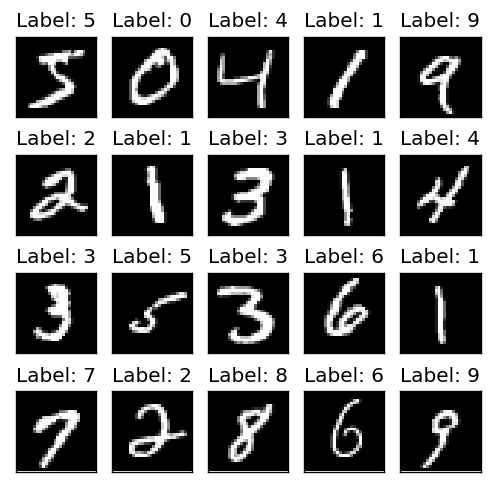

In [ ]:
fig, ax_array = plt.subplots(4, 5, figsize=(5, 5))
for i, ax in enumerate(ax_array.flat):
    img, label = dataset_train[i]
    ax.imshow(img[0].numpy(), cmap='gray')
    ax.set_title('Label: {}'.format(label))
    ax.set_yticks([])
    ax.set_xticks([])

print_math('Number of rows in the train dataset: $N={}$'.format(len(dataset_train)))
print_math('Number of rows in the test dataset: $N={}$'.format(len(dataset_test)))

print_math('Image size: {}x{}'.format(img.shape[1], img.shape[2]))
print_math('Pixel''s value range: [{}, {}]'.format(img.min(), img.max()))

## 📜 Problem Definition

For the following given random system:

- Random sample: $\omega$ - A given handwritten digit.
- Random variables:
  - $x=X\left(\omega\right)$: An 28x28 image of the digit.
  - $y=Y\left(\omega\right)$: The digit's value: \[0-9\].

Find a discrimination function $\hat{y}=h^*\left(\boldsymbol{x}\right)$ which minimizes the misclassification rate:

$$
h^*=\underset{h}{\arg\min}\ E\left[I\left\{h\left(\boldsymbol{x}\right)\neq y\right\}\right]
$$

### 📚 Splitting the dataset

Since the data is already divided into a train set and a test set, we only need to split the loaded train set into a validation and train sets.

Since we would later want to use the validation set for performing a quick evaluation of the system's performance during the learning stage, we would like to keep the validation set small. Taking 25% of the train set will result in a very larger dataset, which will take a lot of time to evaluate. 

Here we will use a validation set of 1024 samples. Deciding on this number usually comes for the time we are willing to spend evaluating the performance on the validation set.

We will use *torch*'s [SubsetRandomSampler](https://pytorch.org/docs/stable/data.html#torch.utils.data.SubsetRandomSampler) for splitting the data without actually copying it.

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

n_samples_train = len(dataset_train)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a shuffle vector of indices
indices = rand_gen.permutation(n_samples_train)

## Split the train indices into 1024 validation sample and all the rest train samples
n_samples_validation = 1024
n_samples_train2 = n_samples_train - n_samples_validation
indices_train2 = indices[:n_samples_train2]
indices_validation = indices[n_samples_train2:]

sampler_train2 = SubsetRandomSampler(indices_train2)
sampler_validation = SubsetRandomSampler(indices_validation)

## 💡 Model & Learning Method Suggestion: CNN: LeNet-5

As stated before, we would like to use the LeNet-5 network as our classifier.

We will use mini-batch stochastic gradient descent for training the network (optimizing the parameters of the networks).

### Parameters:

Our model's parameters are of the weights and biases of the convolutional and fully connected layers.


### Hyper-parameters

The hyper-parameters of our model + training method are:

- The network's architecture, which we will not change.
- The stochastic gradient descent parameters which are:
  - The learning rate.
  - The Batch size, which we will keep fixed on 64 samples.
  - The maximal number of epochs (the number of times we run over the dataset) which we will define according to the time we are willing to devote to training the system.

### Implementation

Let us implement the LeNet-5 network using the *Torch* framework. Note that the network is designed for an input of size 32x32 while MNIST contains images of size 28x28, therefore, we will need to pad the input images will two zeros on each side of the image.

In [ ]:
class LeNet5(torch.nn.Module):
     
    def __init__(self):   
        super(LeNet5, self).__init__()
        
        ## Defining the layers
        ## =========================================================
        ## C1: Convolutional layer: kernel size=5x5, output channels=6.
        ## Here we will add the padding of 2 to make the images of MNIST fit to the network.
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.relu1 = torch.nn.ReLU()  

        ## S2: Max pooling layer: size=2x2, stride=2
        self.max_pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        ## C3: Convolutional layer + ReLU activation: kernel size=5x5, output channels=16.
        self.conv3 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.relu3 = torch.nn.ReLU()
        
        ## S4: Max pooling layer: size=2x2, stride=2vector)
        self.max_pool4 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        ## C5: Convolutional layer + ReLU activation: kernel size=5x5, output channels=120.
        self.conv5 = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        self.relu5 = torch.nn.ReLU()

        ## F6: Fully connected layer + ReLU: output vector length=84
        self.fc6 = torch.nn.Linear(120, 84)
        self.relu6 = torch.nn.ReLU()
        
        ## Output: Fully connected layer + ReLU: output vector length=10
        self.fc_output = torch.nn.Linear(84, 10)

        ## Note: It is not actually necessary to define multiple ReLUs and max-pooling operations
        ## since these layers have no parameters.
        
        
    def forward(self, x):
        ## C1: Convolutional layer + ReLU activation: kernel size=5x5, output channels=6.
        x = self.conv1(x)
        x = self.relu1(x)
        
        ## S2: Max pooling layer: size=2x2, stride=2
        x = self.max_pool2(x)

        ## C3: Convolutional layer + ReLU activation: kernel size=5x5, output channels=16.
        x = self.conv3(x)
        x = self.relu3(x)

        ## S4: Max pooling layer: size=2x2, stride=2
        x = self.max_pool4(x)

        ## C5: Convolutional layer + ReLU activation: kernel size=5x5, output channels=120.
        x = self.conv5(x)
        x = self.relu5(x)

        x = x.view(x.shape[0], x.shape[1]) ## Redefine x as a 1D vector
        
        ## F6: Fully connected layer + ReLU: output vector length= 84
        x = self.fc6(x)
        x = self.relu6(x)

        ## Output layer: Fully connected layer: output vector length=10
        x = self.fc_output(x)
        
        return x

## ⚙️ Learning

### Defining Data Loaders

The simplest way to load batches of data, is by using Torch's [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) object. We will define one for each dataset:

In [ ]:
# Data Loader
batch_size = 64

dataloader_train2 = torch.utils.data.DataLoader(dataset=dataset_train,
                                                batch_size=batch_size,
                                                sampler=sampler_train2)

dataloader_validation = torch.utils.data.DataLoader(dataset=dataset_train,
                                                    batch_size=batch_size,
                                                    sampler=sampler_validation)

dataloader_test = torch.utils.data.DataLoader(dataset=dataset_test,
                                              batch_size=batch_size,
                                              )

### Defining the Training Function

In [ ]:
def train(net, alpha, n_epoch, dataloader_train2, dataloader_validation, device_id='cpu'):
    loss_train_list = []
    loss_validation_list = []
    validation_steps = []

    loss_func = loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=alpha)

    step = 0
    for epoch in range(n_epoch):
        for batch_train, labels_train in dataloader_train2:
            if step % run_validation_every == 0:
                ## Run validataion
                with torch.no_grad():
                    loss_validation_list_tmp = []
                    for batch_validataion, labels_validataion in dataloader_validation:
                        batch_validataion = batch_validataion.to(device_id)
                        labels_validataion = labels_validataion.to(device_id)

                        y_hat = net(batch_validataion)
                        loss = loss_func(y_hat, labels_validataion)

                        loss_validation_list_tmp.append(float(loss.cpu()))

                    loss_validation_list.append(np.mean(loss_validation_list_tmp))
                    validation_steps.append(step)

            ## Train
            batch_train = batch_train.to(device_id)
            labels_train = labels_train.to(device_id)

            optimizer.zero_grad()
            y_hat = net(batch_train)
            loss = loss_func(y_hat, labels_train)
            loss.backward()
            optimizer.step()

            loss_train_list.append(float(loss.cpu()))

            step += 1
    
    return loss_train_list, loss_validation_list, validation_steps

## Selecting the Learning Rate

We will test 3 learning rates to set the behavior of the training process as a function of the learning rate. In practice, more then just 3 learning rates should be tested in order to fine-tune the learning rate.

We will run the training process for 1 epoch with each of the following learning rates: $\alpha=10^{0},10^{-1},10^{-2}$.

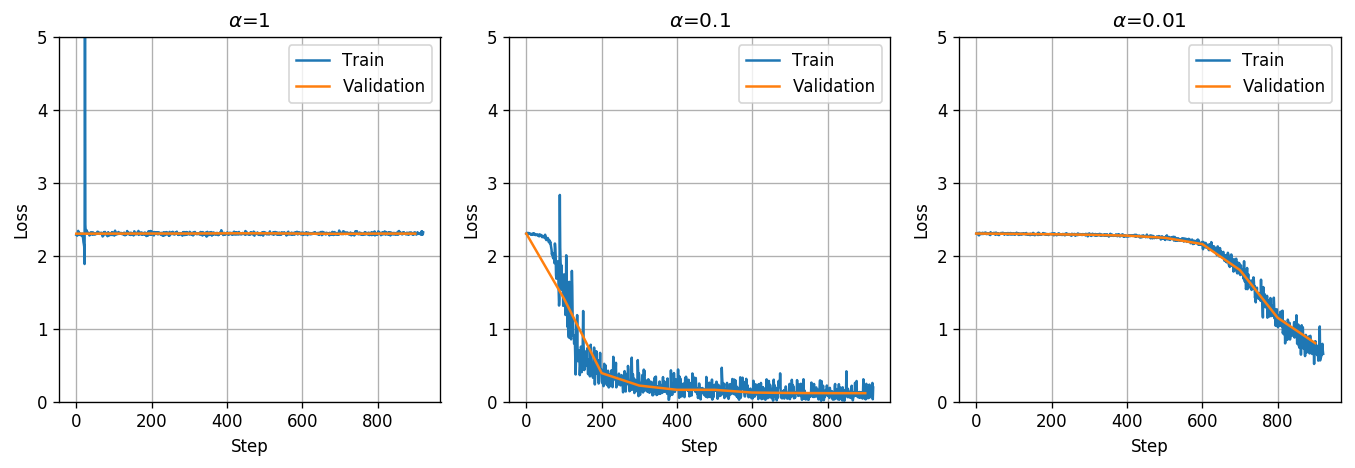

In [ ]:
device_id = 'cpu'  # 'cuda:0'

n_epoch = 1
run_validation_every = 100
alpha_list = [1e0, 1e-1, 1e-2]

## Prepare plots
fig, axis_list = plt.subplots(1, 3, figsize=(12, 4))

## Iterate over the learning rates
for i_alpha, alpha in enumerate(alpha_list):
    net = LeNet5()
    net = net.to(device_id)
    
    loss_train_list, loss_validation_list, validation_steps = train(net, alpha, n_epoch,
                                                                    dataloader_train2,
                                                                    dataloader_validation,
                                                                    device_id=device_id)

    ax = axis_list.flat[i_alpha]
    ax.plot(loss_train_list, label='Train')
    ax.plot(validation_steps, loss_validation_list, label='Validation')
    ax.set_title('$\\alpha$={:g}'.format(alpha))
    ax.set_xlabel('Step')
    ax.set_ylabel('Loss')
    ax.set_ylim(0, 5)
    ax.legend()
plt.tight_layout(rect=(0, 0, 0.95, 1))

We got that for a learning rate of $\alpha=10^{0}$ the system is not able to improve at all. This can be the result of either a learning rate which is too low or too high. Since we can see that for a learning rate of $\alpha=10^{-1}$ the training does improve the loss function we can conclude that a learning rate of $\alpha=10^{0}$ is too high.

In addition, we got that the learning rate of $\alpha=10^{-1}$ results in a much faster convergence than $10^{-2}$, therefore, from among these three learning rates it is best to pick $\alpha=10^0$.

## Training

We will run the training for 20 epochs using $\alpha=10^{-1}$.

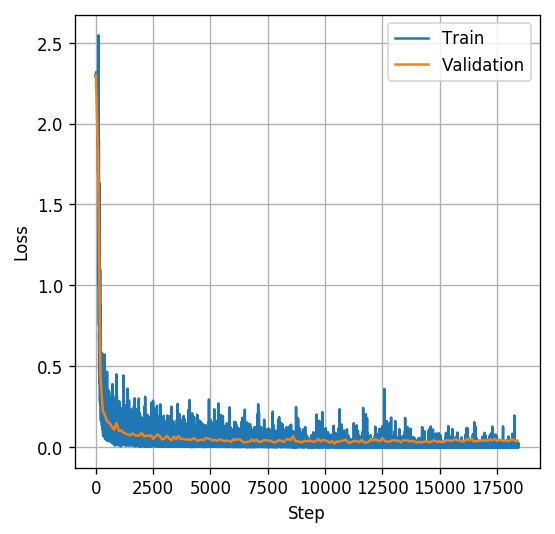

In [ ]:
alpha = 1e-1
n_epoch = 20

net = LeNet5()
net = net.to(device_id)

loss_train_list, loss_validation_list, validation_steps = train(net, alpha, n_epoch,
                                                                dataloader_train2,
                                                                dataloader_validation,
                                                                device_id=device_id)


## Prepare plots
fig, ax = plt.subplots()

ax.plot(loss_train_list, label='Train')
ax.plot(validation_steps, loss_validation_list, label='Validation')
ax.set_xlabel('Step')
ax.set_ylabel('Loss')
ax.legend();

The training graph looks good and it seems as if the validation loss has reached a plateau which might suggest that the system has reached a local minimum point of the validation loss, although we can never be sure.

## ⏱️ Performance evaluation

In [ ]:
## Evaluate the risk on the test set
with torch.no_grad():
    test_risk_tmp = []
    for batch_test, labels_test in dataloader_test:
        batch_test = batch_test.to(device_id)
        labels_test = labels_test.to(device_id)

        y_hat = net(batch_test)
        risk = (torch.argmax(y_hat, dim=1) != labels_test).sum()

        test_risk_tmp.append(float(risk.cpu()))

test_risk = np.sum(test_risk_tmp) / len(dataset_test)

print_math('The test risk is: ${:.2}$'.format(test_risk))

We got a misclassification rate of about 1%, which means that we were able to predict the correctly digit on 99% of the test set, which is quite good. 

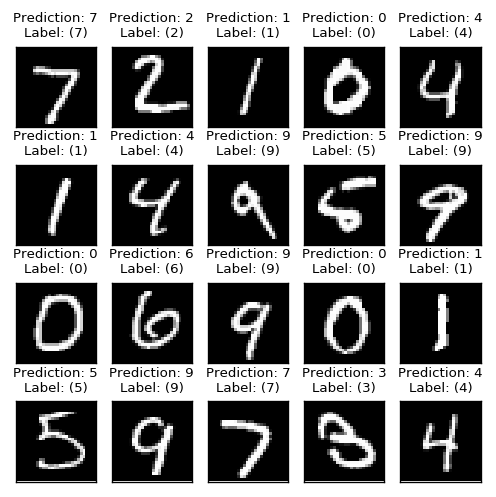

In [ ]:
fig, ax_array = plt.subplots(4, 5, figsize=(5, 5))
for i, ax in enumerate(ax_array.flat):
    img, label = dataset_test[i]
    with torch.no_grad():
        y_hat = int(torch.argmax(net(img[None, :])))
    ax.imshow(img[0].numpy(), cmap='gray')
    ax.set_title('Prediction: {}\nLabel: ({})'.format(y_hat, label), fontsize=8, color='black' if y_hat == label else 'red')
    ax.set_yticks([])
    ax.set_xticks([])

In [ ]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->